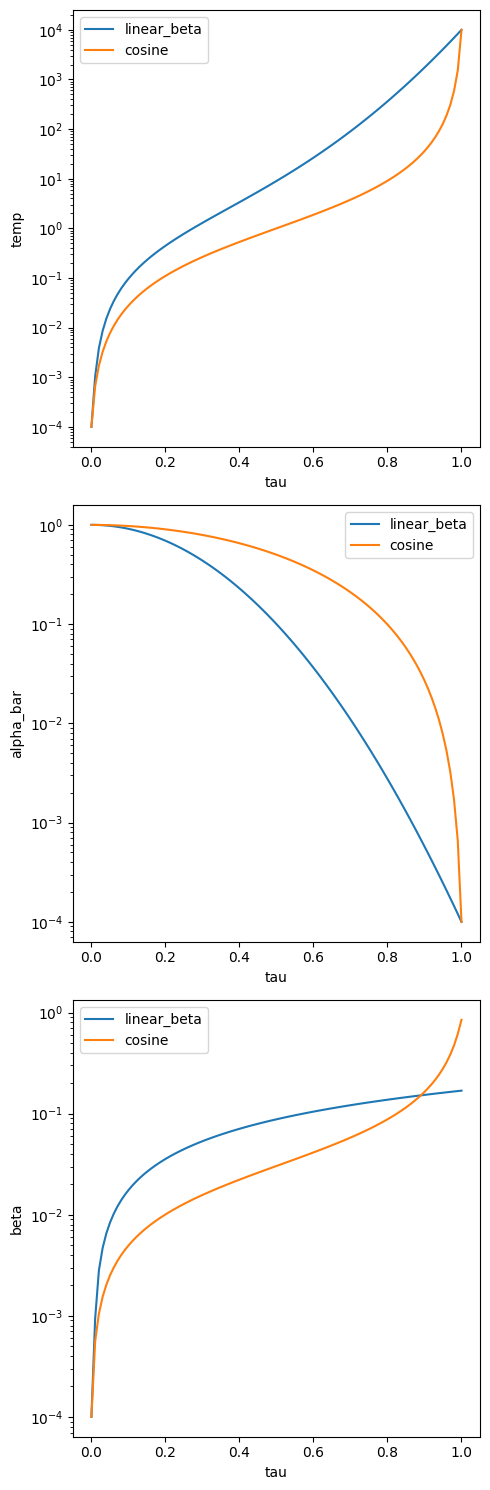

In [9]:
from config import load_config
from diffusion import get_temp_schedule, DynamicCoeffs
import matplotlib.pyplot as plt
from torch import linspace


config = load_config()
tau = linspace(0, 1, 100)
coeffs_dict: dict[str, DynamicCoeffs] = {}
for noise_schedule in [
    "linear_beta",
    "cosine",
    # "entropy_u",
]:
    config.diffusion.noise_schedule = noise_schedule
    coeffs_dict[noise_schedule] = DynamicCoeffs(get_temp_schedule(config)(tau))

coeff_names = ["temp", "alpha_bar", "beta"]


plt.figure(figsize=(5, len(coeff_names) * 5))

for i, coeff_name in enumerate(coeff_names, 1):
    plt.subplot(len(coeff_names), 1, i)
    for name, coeffs in coeffs_dict.items():
        plt.plot(tau, getattr(coeffs, coeff_name), label=name)

    plt.yscale("log")
    plt.xlabel("tau")
    plt.ylabel(coeff_name)
    plt.legend()


plt.tight_layout()
plt.show()